In [1]:
!pip install torch transformers pillow opencv-python easyocr scikit-learn matplotlib seaborn pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 26.8 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,WeightedRandomSampler
from transformers import ViTModel,ViTFeatureExtractor
from PIL import Image
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from torchvision import transforms
from google.colab import drive
drive.mount('/content/drive')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Divice: {device}")

IMAGE_DIR = "/content/drive/MyDrive/Dissertation/images"
CSV_FILE = "/content/drive/MyDrive/Dissertation/labels.csv"
OUTPUT_DIR = "/content/drive/MyDrive/Dissertation/"
CACHE_DIR = "/content/drive/MyDrive/Dissertation/cache"
os.makedirs(OUTPUT_DIR,exist_ok=True)

Mounted at /content/drive
Divice: cuda


Original dataset size: 6992
Existing image files: 6992
Data distribution:
  Training set: 5593 samples
  Validation set: 699 samples
  Test set: 700 samples


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

  Original class counts: [ 121  384 1761 2501  826]
  Minority classes: [0 1 4]
  Enhanced weights: [3.39373633 1.06938046 0.02331869 0.01641912 0.4971454 ]


/usr/local/lib/python3.12/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model parameters: Total 86,949,381, Trainable 29,503,749

Starting training of image-only model...
Class distribution statistics:
  Class 0 (very_negative): 3483 samples
  Class 1 (negative): 3576 samples
  Class 2 (neutral): 354 samples
  Class 3 (positive): 351 samples
  Class 4 (very_positive): 3422 samples
CBFocalLoss configuration:
  Samples per class: [3483 3576  354  351 3422]
  CB weights: [0.52798632 0.5210755  1.70472915 1.71353759 0.53267144]
  Alpha weights: [0.10077519 0.09815436 0.99152542 1.         0.1025716 ]

Epoch 1/15


Epoch 1 Training:  42%|████▏     | 297/700 [01:32<02:02,  3.29batch/s, Loss=0.1070]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1 Training: 100%|██████████| 700/700 [03:35<00:00,  3.25batch/s, Loss=1.0200]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.18batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0268    0.2000    0.0472        15
     negative     0.0636    0.5208    0.1134        48
      neutral     0.2857    0.0182    0.0342       220
     positive     0.3913    0.0288    0.0536       313
very_positive     0.1401    0.2136    0.1692       103

     accuracy                         0.0901       699
    macro avg     0.1815    0.1963    0.0835       699
 weighted avg     0.2907    0.0901    0.0685       699


Epoch 1 Results:
Training loss: 0.2805
Training F1: 0.2232
Training Macro F1: 0.1600
Validation loss: 2.1433
Validation accuracy: 0.0901 (9.01%)
Validation F1: 0.0685
Validation Macro F1: 0.0835
IMPROVING ★

Epoch 2/15


Epoch 2 Training: 100%|██████████| 700/700 [03:38<00:00,  3.20batch/s, Loss=0.1293]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.21batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0159    0.1333    0.0284        15
     negative     0.0690    0.4583    0.1199        48
      neutral     0.1667    0.0045    0.0088       220
     positive     0.3000    0.0096    0.0186       313
very_positive     0.1681    0.3883    0.2346       103

     accuracy                         0.0973       699
    macro avg     0.1439    0.1988    0.0821       699
 weighted avg     0.2166    0.0973    0.0545       699


Epoch 2 Results:
Training loss: 0.2742
Training F1: 0.2645
Training Macro F1: 0.1893
Validation loss: 2.0492
Validation accuracy: 0.0973 (9.73%)
Validation F1: 0.0545
Validation Macro F1: 0.0821
No improvement (1/6)

Epoch 3/15


Epoch 3 Training: 100%|██████████| 700/700 [03:34<00:00,  3.26batch/s, Loss=0.0616]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.21batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0108    0.0667    0.0185        15
     negative     0.0763    0.4167    0.1290        48
      neutral     0.0000    0.0000    0.0000       220
     positive     0.6250    0.0160    0.0312       313
very_positive     0.1284    0.4175    0.1963       103

     accuracy                         0.0987       699
    macro avg     0.1681    0.1834    0.0750       699
 weighted avg     0.3043    0.0987    0.0521       699


Epoch 3 Results:
Training loss: 0.2644
Training F1: 0.2905
Training Macro F1: 0.1998
Validation loss: 1.9698
Validation accuracy: 0.0987 (9.87%)
Validation F1: 0.0521
Validation Macro F1: 0.0750
No improvement (2/6)

Epoch 4/15


Epoch 4 Training: 100%|██████████| 700/700 [03:34<00:00,  3.26batch/s, Loss=0.0645]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.20batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0187    0.1333    0.0328        15
     negative     0.0754    0.3125    0.1215        48
      neutral     0.0000    0.0000    0.0000       220
     positive     0.5000    0.0128    0.0249       313
very_positive     0.1597    0.5922    0.2515       103

     accuracy                         0.1173       699
    macro avg     0.1508    0.2102    0.0861       699
 weighted avg     0.2530    0.1173    0.0573       699


Epoch 4 Results:
Training loss: 0.2517
Training F1: 0.3014
Training Macro F1: 0.2057
Validation loss: 1.8835
Validation accuracy: 0.1173 (11.73%)
Validation F1: 0.0573
Validation Macro F1: 0.0861
IMPROVING ★

Epoch 5/15


Epoch 5 Training: 100%|██████████| 700/700 [03:38<00:00,  3.21batch/s, Loss=0.0816]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.18batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0091    0.0667    0.0160        15
     negative     0.0585    0.2083    0.0913        48
      neutral     0.1667    0.0045    0.0088       220
     positive     0.0000    0.0000    0.0000       313
very_positive     0.1446    0.5728    0.2309       103

     accuracy                         0.1016       699
    macro avg     0.0758    0.1705    0.0694       699
 weighted avg     0.0780    0.1016    0.0434       699


Epoch 5 Results:
Training loss: 0.2478
Training F1: 0.3045
Training Macro F1: 0.2096
Validation loss: 1.8017
Validation accuracy: 0.1016 (10.16%)
Validation F1: 0.0434
Validation Macro F1: 0.0694
No improvement (1/6)

Epoch 6/15


Epoch 6 Training: 100%|██████████| 700/700 [03:34<00:00,  3.26batch/s, Loss=0.0842]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.19batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0241    0.1333    0.0408        15
     negative     0.0549    0.1875    0.0849        48
      neutral     0.2800    0.0318    0.0571       220
     positive     0.1429    0.0032    0.0063       313
very_positive     0.1452    0.5922    0.2333       103

     accuracy                         0.1144       699
    macro avg     0.1294    0.1896    0.0845       699
 weighted avg     0.1778    0.1144    0.0619       699


Epoch 6 Results:
Training loss: 0.2472
Training F1: 0.3079
Training Macro F1: 0.2152
Validation loss: 1.7198
Validation accuracy: 0.1144 (11.44%)
Validation F1: 0.0619
Validation Macro F1: 0.0845
No improvement (2/6)

Epoch 7/15


Epoch 7 Training: 100%|██████████| 700/700 [03:34<00:00,  3.26batch/s, Loss=0.0905]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.21batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0093    0.0667    0.0163        15
     negative     0.0446    0.1042    0.0625        48
      neutral     0.3889    0.0318    0.0588       220
     positive     0.5000    0.0032    0.0063       313
very_positive     0.1373    0.6117    0.2242       103

     accuracy                         0.1102       699
    macro avg     0.2160    0.1635    0.0736       699
 weighted avg     0.3698    0.1102    0.0590       699


Epoch 7 Results:
Training loss: 0.2391
Training F1: 0.3109
Training Macro F1: 0.2149
Validation loss: 1.7250
Validation accuracy: 0.1102 (11.02%)
Validation F1: 0.0590
Validation Macro F1: 0.0736
No improvement (3/6)

Epoch 8/15


Epoch 8 Training: 100%|██████████| 700/700 [03:34<00:00,  3.26batch/s, Loss=0.0853]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.23batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0105    0.0667    0.0182        15
     negative     0.0794    0.1042    0.0901        48
      neutral     0.3571    0.0227    0.0427       220
     positive     0.0000    0.0000    0.0000       313
very_positive     0.1527    0.7767    0.2552       103

     accuracy                         0.1302       699
    macro avg     0.1199    0.1941    0.0812       699
 weighted avg     0.1406    0.1302    0.0576       699


Epoch 8 Results:
Training loss: 0.2428
Training F1: 0.3211
Training Macro F1: 0.2245
Validation loss: 1.6908
Validation accuracy: 0.1302 (13.02%)
Validation F1: 0.0576
Validation Macro F1: 0.0812
No improvement (4/6)

Epoch 9/15


Epoch 9 Training: 100%|██████████| 700/700 [03:34<00:00,  3.26batch/s, Loss=0.0754]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.22batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0156    0.1333    0.0280        15
     negative     0.0495    0.1042    0.0671        48
      neutral     0.2000    0.0045    0.0089       220
     positive     0.2000    0.0032    0.0063       313
very_positive     0.1348    0.6019    0.2202       103

     accuracy                         0.1016       699
    macro avg     0.1200    0.1694    0.0661       699
 weighted avg     0.1761    0.1016    0.0433       699


Epoch 9 Results:
Training loss: 0.2379
Training F1: 0.3333
Training Macro F1: 0.2318
Validation loss: 1.6695
Validation accuracy: 0.1016 (10.16%)
Validation F1: 0.0433
Validation Macro F1: 0.0661
No improvement (5/6)

Epoch 10/15


Epoch 10 Training: 100%|██████████| 700/700 [03:34<00:00,  3.27batch/s, Loss=1.4483]



Validating...


Validation: 100%|██████████| 44/44 [00:08<00:00,  5.22batch/s]



Validation classification report:
               precision    recall  f1-score   support

very_negative     0.0286    0.2667    0.0516        15
     negative     0.0426    0.0833    0.0563        48
      neutral     0.0000    0.0000    0.0000       220
     positive     0.2857    0.0064    0.0125       313
very_positive     0.1469    0.6505    0.2397       103

     accuracy                         0.1102       699
    macro avg     0.1008    0.2014    0.0720       699
 weighted avg     0.1531    0.1102    0.0459       699


Epoch 10 Results:
Training loss: 0.2386
Training F1: 0.3498
Training Macro F1: 0.2408
Validation loss: 1.6786
Validation accuracy: 0.1102 (11.02%)
Validation F1: 0.0459
Validation Macro F1: 0.0720
No improvement (6/6)

Macro F1-based early stopping triggered! No improvement for 6 consecutive epochs

Training results saved to: /content/drive/MyDrive/Dissertation/image_only_training_results.csv

Loading best model for testing...
Starting final testing...


Testing: 100%|██████████| 44/44 [01:22<00:00,  1.88s/batch]



=== Final Test Results (Image Only) ===
Test accuracy: 0.1114 (11.14%)
Test weighted F1: 0.0563
Test macro F1: 0.0842

Detailed test classification report:
               precision    recall  f1-score   support

very_negative     0.0150    0.1333    0.0270        15
     negative     0.0778    0.2917    0.1228        48
      neutral     0.2000    0.0045    0.0089       220
     positive     0.3000    0.0096    0.0186       313
very_positive     0.1559    0.5577    0.2437       104

     accuracy                         0.1114       700
    macro avg     0.1497    0.1994    0.0842       700
 weighted avg     0.2258    0.1114    0.0563       700


Training completed, files saved to: /content/drive/MyDrive/Dissertation/
Best model: /content/drive/MyDrive/Dissertation/best_image_only_model.pth
Training results CSV: /content/drive/MyDrive/Dissertation/image_only_training_results.csv
Test results CSV: /content/drive/MyDrive/Dissertation/image_only_test_results.csv
Training curves plot: /co

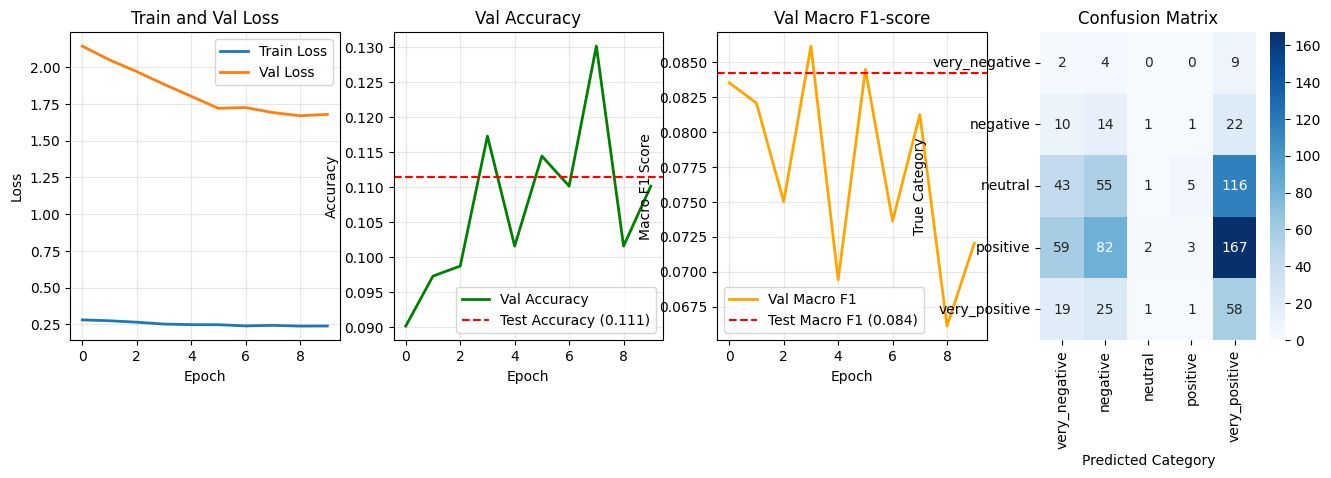

In [4]:
# Dataset using only images
class ImageOnlyDataset(Dataset):
    def __init__(self,image_paths,labels,feature_extractor):
        self.image_paths = image_paths
        self.labels = labels
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self,idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = Image.open(image_path)
            if image.mode != 'RGB':
                image = image.convert('RGB')

            # Image enhancement
            image = self.enhance_image(image)

            # Feature extraction
            image_encoding = self.feature_extractor(image,return_tensors='pt')

        except Exception as e:
            print(f"Image processing failed {image_path}: {e}")
            image = Image.new('RGB',(224,224),color=(255,255,255))
            image_encoding = self.feature_extractor(image,return_tensors='pt')

        return {
            'image_pixel_values': image_encoding['pixel_values'].squeeze(),
            'label': torch.tensor(label,dtype=torch.long),
            'image_path': image_path
        }

    # Image preprocessing enhancement
    def enhance_image(self,image):
        try:
            if image.mode != 'RGB':
                image = image.convert('RGB')

            transform_list = []
            transform_list.append(transforms.RandomResizedCrop(224,scale=(0.8,1.0)))
            transform_list.append(transforms.RandomHorizontalFlip(p=0.5))
            transform_list.append(transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2,hue=0.02))

            transform = transforms.Compose(transform_list + [
                transforms.Resize((224,224)),
            ])

            pil_transformed = transform(image)

            # Sharpening processing
            from PIL import ImageFilter
            pil_transformed = pil_transformed.filter(ImageFilter.UnsharpMask(radius=1,percent=120,threshold=1))

            return pil_transformed

        except Exception as e:
            print(f"Image enhancement failed, returning original image: {e}")
            return image.convert('RGB') if image.mode != 'RGB' else image

# Class-Balanced Focal Loss
class CBFocalLoss(nn.Module):
    def __init__(self,samples_per_class,num_classes,beta=0.95,gamma=2.3,alpha=None,reduction='mean'):
        super(CBFocalLoss,self).__init__()
        samples_per_class = np.maximum(samples_per_class,1)

        effective_num = 1.0 - np.power(beta,samples_per_class)
        weights = (1.0 - beta) / effective_num

        min_samples = np.min(samples_per_class)
        max_samples = np.max(samples_per_class)
        ratio = max_samples / (samples_per_class + 1e-6)

        combined_weights = weights * (ratio ** 0.5)
        combined_weights = combined_weights / np.sum(combined_weights) * num_classes

        self.class_weights = torch.tensor(combined_weights,dtype=torch.float32)
        self.num_classes = num_classes
        self.gamma = gamma
        self.reduction = reduction

        if alpha is None:
            inv_freq = 1.0 / (samples_per_class + 1e-6)
            alpha = inv_freq / inv_freq.sum()
            alpha = alpha / alpha.max()

        self.alpha = torch.tensor(alpha,dtype=torch.float32)

        print(f"CBFocalLoss configuration:")
        print(f"  Samples per class: {samples_per_class}")
        print(f"  CB weights: {combined_weights}")
        print(f"  Alpha weights: {alpha}")

    def forward(self,logits,labels):
        device = logits.device
        weights = self.class_weights.to(device)
        alpha = self.alpha.to(device)

        log_probs = F.log_softmax(logits,dim=1)
        ce_loss = F.nll_loss(log_probs,labels,reduction='none')

        probs = torch.exp(log_probs)
        pt = probs.gather(1,labels.unsqueeze(1)).squeeze(1)
        pt = torch.clamp(pt,min=1e-7,max=1.0)

        focal_term = (1 - pt) ** self.gamma
        alpha_t = alpha[labels]
        cb_weights = weights[labels]

        loss = alpha_t * cb_weights * focal_term * ce_loss

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

# Emotion classifier using only images
class ImageOnlyClassifier(nn.Module):
    def __init__(self,num_classes=5,hidden_dim=256):
        super(ImageOnlyClassifier,self).__init__()

        self.image_encoder = ViTModel.from_pretrained('google/vit-base-patch16-224')
        self.image_dim = self.image_encoder.config.hidden_size

        # Freeze some layers
        self._freeze_layers()

        self.classifier = nn.Sequential(
            nn.Linear(self.image_dim,hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden_dim,hidden_dim // 2),
            nn.LayerNorm(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(hidden_dim // 2,hidden_dim // 4),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden_dim // 4,num_classes)
        )

        self._init_weights()

    def _init_weights(self):
        for m in self.classifier.modules():
            if isinstance(m,nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)

    # Freeze early layers of pretrained model
    def _freeze_layers(self):
        if hasattr(self.image_encoder,'embeddings'):
            for param in self.image_encoder.embeddings.parameters():
                param.requires_grad = False

        if hasattr(self.image_encoder,'encoder'):
            total_layers = len(self.image_encoder.encoder.layer)
            freeze_layers = min(8,max(total_layers - 4,0))
            for layer in self.image_encoder.encoder.layer[:freeze_layers]:
                for param in layer.parameters():
                    param.requires_grad = False

    def forward(self,image_pixel_values):
        image_outputs = self.image_encoder(pixel_values=image_pixel_values,output_attentions=True)
        image_features = image_outputs.last_hidden_state[:,0]  # CLS token
        logits = self.classifier(image_features)

        # Get attention weights for visualization
        image_attentions = image_outputs.attentions
        if image_attentions and len(image_attentions) > 0:
            last_layer_attention = image_attentions[-1]
            if len(last_layer_attention.shape) == 4 and last_layer_attention.shape[2] > 1:
                avg_attention = last_layer_attention.mean(dim=1)
                image_attn_weights = avg_attention[:,0,1:]
            else:
                image_attn_weights = None
        else:
            image_attn_weights = None

        return logits,image_attn_weights

class EarlyStopping:
    def __init__(self,patience=7,min_delta=0.001,restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_loss = None
        self.counter = 0
        self.best_weights = None

    def __call__(self,val_loss,model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(model)
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1

        return self.counter >= self.patience

    def save_checkpoint(self,model):
        if self.restore_best_weights:
            self.best_weights = copy.deepcopy(model.state_dict())

    def restore(self,model):
        if self.best_weights is not None:
            model.load_state_dict(self.best_weights)

def calculate_class_distribution(labels,num_classes=5):
    class_counts = np.bincount(labels,minlength=num_classes)
    samples_per_class = class_counts[:num_classes]

    print(f"Class distribution statistics:")
    emotion_labels = ['very_negative','negative','neutral','positive','very_positive']
    for i,count in enumerate(samples_per_class):
        print(f"  Class {i} ({emotion_labels[i]}): {count} samples")

    return samples_per_class

def create_balanced_sampler(labels,minority_oversample_factor=8):
    labels = np.array(labels)
    class_counts = np.bincount(labels,minlength=5)

    minority_threshold = 900
    minority_classes = np.where(class_counts < minority_threshold)[0]

    base_weights = 1.0 / (class_counts + 1e-6)
    enhanced_weights = base_weights.copy()

    for cls_idx in minority_classes:
        enhanced_weights[cls_idx] *= minority_oversample_factor

    enhanced_weights = enhanced_weights / enhanced_weights.sum() * len(enhanced_weights)
    sample_weights = [enhanced_weights[label] for label in labels]

    print(f"  Original class counts: {class_counts}")
    print(f"  Minority classes: {minority_classes}")
    print(f"  Enhanced weights: {enhanced_weights}")

    return sample_weights

# Train image-only model
def train_image_only_model(model,train_loader,val_loader,num_epochs=20,learning_rate=2e-5,save_dir=OUTPUT_DIR):

    # Calculate class distribution
    all_labels = []
    for batch in train_loader:
        all_labels.extend(batch['label'].tolist())
    samples_per_class = calculate_class_distribution(all_labels,num_classes=5)

    criterion = CBFocalLoss(
        samples_per_class=samples_per_class,
        num_classes=5,
        beta=0.99,
        gamma=1.5,
        alpha=None
    )

    # Optimizer
    optimizer = optim.AdamW([
        {'params': model.image_encoder.parameters(),'lr': learning_rate * 0.01,'weight_decay': 1e-3},
        {'params': model.classifier.parameters(),'lr': learning_rate,'weight_decay': 2e-3}
    ],eps=1e-8,betas=(0.9,0.999))

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,mode='max',factor=0.8,patience=3,min_lr=1e-7
    )

    # Early stopping
    early_stopping = EarlyStopping(patience=6,min_delta=0.002)
    best_val_macro_f1 = 0
    patience = 6
    patience_counter = 0

    train_losses = []
    val_losses = []
    val_accuracies = []
    val_f1_scores = []
    val_macro_f1_scores = []
    training_results = []

    emotion_labels = ['very_negative','negative','neutral','positive','very_positive']

    for epoch in range(num_epochs):
        print(f"\n{'='*60}")
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"{'='*60}")

        model.train()
        total_train_loss = 0
        all_train_predictions = []
        all_train_labels = []
        num_batches = 0

        train_pbar = tqdm(train_loader,desc=f"Epoch {epoch+1} Training",unit="batch")

        for batch in train_pbar:
            optimizer.zero_grad()

            logits,_ = model(batch['image_pixel_values'].to(device))
            labels = batch['label'].to(device)

            loss = criterion(logits,labels)

            # L1 regularization
            l1_reg = torch.tensor(0.,requires_grad=True)
            for name,param in model.named_parameters():
                if 'weight' in name and 'encoder' not in name:
                    l1_reg = l1_reg + torch.norm(param,1)

            total_loss = loss + 1e-6 * l1_reg

            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(),max_norm=0.3)
            optimizer.step()

            total_train_loss += total_loss.item()
            num_batches += 1

            predictions = torch.argmax(logits,dim=1).cpu().numpy()
            labels_np = labels.cpu().numpy()
            all_train_predictions.extend(predictions)
            all_train_labels.extend(labels_np)

            train_pbar.set_postfix({'Loss': f'{total_loss.item():.4f}'})

        # Calculate training metrics
        avg_train_loss = total_train_loss / num_batches
        train_f1 = f1_score(all_train_labels,all_train_predictions,average='weighted')
        train_macro_f1 = f1_score(all_train_labels,all_train_predictions,average='macro')
        train_losses.append(avg_train_loss)

        print("\nValidating...")
        model.eval()
        total_val_loss = 0
        all_val_predictions = []
        all_val_labels = []

        with torch.no_grad():
            for batch in tqdm(val_loader,desc="Validation",unit="batch"):
                logits,_ = model(batch['image_pixel_values'].to(device))
                labels = batch['label'].to(device)
                loss = criterion(logits,labels)
                total_val_loss += loss.item()

                predictions = torch.argmax(logits,dim=1).cpu().numpy()
                labels_np = labels.cpu().numpy()
                all_val_predictions.extend(predictions)
                all_val_labels.extend(labels_np)

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = accuracy_score(all_val_labels,all_val_predictions)
        val_f1 = f1_score(all_val_labels,all_val_predictions,average='weighted')
        val_macro_f1 = f1_score(all_val_labels,all_val_predictions,average='macro')

        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)
        val_macro_f1_scores.append(val_macro_f1)

        scheduler.step(val_macro_f1)

        val_report = classification_report(all_val_labels,all_val_predictions,target_names=emotion_labels,digits=4)
        print(f"\nValidation classification report:")
        print(val_report)

        improved = ""
        if val_macro_f1 > best_val_macro_f1:
            best_val_macro_f1 = val_macro_f1
            patience_counter = 0
            improved = "IMPROVING ★"
            torch.save(model.state_dict(),os.path.join(save_dir,'best_image_only_model.pth'))
        else:
            patience_counter += 1
            improved = f"No improvement ({patience_counter}/{patience})"

        print(f"\nEpoch {epoch+1} Results:")
        print(f"Training loss: {avg_train_loss:.4f}")
        print(f"Training F1: {train_f1:.4f}")
        print(f"Training Macro F1: {train_macro_f1:.4f}")
        print(f"Validation loss: {avg_val_loss:.4f}")
        print(f"Validation accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
        print(f"Validation F1: {val_f1:.4f}")
        print(f"Validation Macro F1: {val_macro_f1:.4f}")
        print(f"{improved}")

        training_results.append({
            'epoch': epoch + 1,
            'train_loss': avg_train_loss,
            'train_f1': train_f1,
            'train_macro_f1': train_macro_f1,
            'val_loss': avg_val_loss,
            'val_accuracy': val_accuracy,
            'val_f1': val_f1,
            'val_macro_f1': val_macro_f1,
            'best_val_macro_f1': best_val_macro_f1,
            'patience_counter': patience_counter,
            'improved': improved
        })

        # Early stopping check
        if early_stopping(avg_val_loss,model):
            print(f"\nEarly stopping triggered! No improvement for {early_stopping.patience} consecutive epochs")
            early_stopping.restore(model)
            break

        if patience_counter >= patience:
            print(f"\nMacro F1-based early stopping triggered! No improvement for {patience} consecutive epochs")
            break

    results_df = pd.DataFrame(training_results)
    results_csv_path = os.path.join(save_dir,'image_only_training_results.csv')
    results_df.to_csv(results_csv_path,index=False)
    print(f"\nTraining results saved to: {results_csv_path}")

    return train_losses,val_losses,val_accuracies,val_f1_scores,val_macro_f1_scores

def prepare_data(labels_csv_path,images_dir):
    df = pd.read_csv(labels_csv_path)
    print(f"Original dataset size: {len(df)}")

    emotion_map = {
        'very_positive': 4,
        'positive': 3,
        'neutral': 2,
        'negative': 1,
        'very_negative': 0
    }

    df['emotion_id'] = df['overall_sentiment'].map(emotion_map)
    df['full_path'] = df['image_name'].apply(lambda x: os.path.join(images_dir,x))

    existing_files = df[df['full_path'].apply(os.path.exists)]
    print(f"Existing image files: {len(existing_files)}")

    return existing_files

def main():
    df = prepare_data(CSV_FILE,IMAGE_DIR)

    train_df,temp_df = train_test_split(df,test_size=0.2,random_state=42,stratify=df['emotion_id'])
    val_df,test_df = train_test_split(temp_df,test_size=0.5,random_state=42,stratify=temp_df['emotion_id'])

    print(f"Data distribution:")
    print(f"  Training set: {len(train_df)} samples")
    print(f"  Validation set: {len(val_df)} samples")
    print(f"  Test set: {len(test_df)} samples")

    # Initialize feature extractor
    feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

    train_dataset = ImageOnlyDataset(
        train_df['full_path'].tolist(),
        train_df['emotion_id'].tolist(),
        feature_extractor
    )

    val_dataset = ImageOnlyDataset(
        val_df['full_path'].tolist(),
        val_df['emotion_id'].tolist(),
        feature_extractor
    )

    test_dataset = ImageOnlyDataset(
        test_df['full_path'].tolist(),
        test_df['emotion_id'].tolist(),
        feature_extractor
    )

    sample_weights = create_balanced_sampler(train_df['emotion_id'].tolist(),minority_oversample_factor=10)

    total_samples = len(train_df)
    num_samples_per_epoch = max(total_samples * 2,8000)
    sampler = WeightedRandomSampler(sample_weights,num_samples=num_samples_per_epoch,replacement=True)

    train_loader = DataLoader(train_dataset,batch_size=16,sampler=sampler,num_workers=2)
    val_loader = DataLoader(val_dataset,batch_size=16,shuffle=False,num_workers=2)
    test_loader = DataLoader(test_dataset,batch_size=16,shuffle=False,num_workers=2)

    model = ImageOnlyClassifier(num_classes=5,hidden_dim=512)
    model.to(device)

    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Model parameters: Total {total_params:,}, Trainable {trainable_params:,}")

    print(f"\nStarting training of image-only model...")
    train_losses,val_losses,val_accuracies,val_f1_scores,val_macro_f1_scores = train_image_only_model(
        model,train_loader,val_loader,num_epochs=15,learning_rate=2e-5
    )

    # Load best model for testing
    print(f"\nLoading best model for testing...")
    model.load_state_dict(torch.load(os.path.join(OUTPUT_DIR,'best_image_only_model.pth')))
    model.eval()

    all_test_predictions = []
    all_test_labels = []

    print("Starting final testing...")
    with torch.no_grad():
        for batch in tqdm(test_loader,desc="Testing",unit="batch"):
            logits,_ = model(batch['image_pixel_values'].to(device))
            predictions = torch.argmax(logits,dim=1).cpu().numpy()
            labels = batch['label'].cpu().numpy()

            all_test_predictions.extend(predictions)
            all_test_labels.extend(labels)

    test_accuracy = accuracy_score(all_test_labels,all_test_predictions)
    test_f1 = f1_score(all_test_labels,all_test_predictions,average='weighted')
    test_macro_f1 = f1_score(all_test_labels,all_test_predictions,average='macro')

    print(f"\n=== Final Test Results (Image Only) ===")
    print(f"Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"Test weighted F1: {test_f1:.4f}")
    print(f"Test macro F1: {test_macro_f1:.4f}")

    emotion_labels = ['very_negative','negative','neutral','positive','very_positive']
    test_report = classification_report(all_test_labels,all_test_predictions,target_names=emotion_labels,digits=4)
    print(f"\nDetailed test classification report:")
    print(test_report)

    test_results = {
        'model_type': 'image_only',
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'test_macro_f1': test_macro_f1,
        'classification_report': test_report
    }

    test_results_df = pd.DataFrame([test_results])
    test_csv_path = os.path.join(OUTPUT_DIR,'image_only_test_results.csv')
    test_results_df.to_csv(test_csv_path,index=False)

    # Plot training curves and confusion matrix
    plt.figure(figsize=(16,4))

    plt.subplot(1,4,1)
    plt.plot(train_losses,label='Train Loss',linewidth=2)
    plt.plot(val_losses,label='Val Loss',linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Val Loss')
    plt.legend()
    plt.grid(True,alpha=0.3)

    plt.subplot(1,4,2)
    plt.plot(val_accuracies,label='Val Accuracy',color='green',linewidth=2)
    plt.axhline(y=test_accuracy,color='red',linestyle='--',label=f'Test Accuracy ({test_accuracy:.3f})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Val Accuracy')
    plt.legend()
    plt.grid(True,alpha=0.3)

    plt.subplot(1,4,3)
    plt.plot(val_macro_f1_scores,label='Val Macro F1',color='orange',linewidth=2)
    plt.axhline(y=test_macro_f1,color='red',linestyle='--',label=f'Test Macro F1 ({test_macro_f1:.3f})')
    plt.xlabel('Epoch')
    plt.ylabel('Macro F1 Score')
    plt.title('Val Macro F1-score')
    plt.legend()
    plt.grid(True,alpha=0.3)

    # Confusion matrix
    plt.subplot(1,4,4)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(all_test_labels,all_test_predictions)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=emotion_labels,yticklabels=emotion_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Category')
    plt.ylabel('True Category')

    final_summary = {
        'model_name': 'Image Only Emotion Classifier',
        'total_params': total_params,
        'trainable_params': trainable_params,
        'train_samples': len(train_df),
        'val_samples': len(val_df),
        'test_samples': len(test_df),
        'final_test_accuracy': test_accuracy,
        'final_test_f1': test_f1,
        'final_test_macro_f1': test_macro_f1,
        'best_val_f1': max(val_f1_scores) if val_f1_scores else 0,
        'epochs_trained': len(train_losses),
        'image_encoder': 'google/vit-base-patch16-224'
    }

    summary_df = pd.DataFrame([final_summary])
    summary_csv_path = os.path.join(OUTPUT_DIR,'image_only_model_summary.csv')
    summary_df.to_csv(summary_csv_path,index=False)

    print(f"\nTraining completed, files saved to: {OUTPUT_DIR}")
    print(f"Best model: {OUTPUT_DIR}best_image_only_model.pth")
    print(f"Training results CSV: {OUTPUT_DIR}image_only_training_results.csv")
    print(f"Test results CSV: {OUTPUT_DIR}image_only_test_results.csv")
    print(f"Training curves plot: {OUTPUT_DIR}image_only_training_analysis.png")
    print(f"Model summary: {OUTPUT_DIR}image_only_model_summary.csv")

if __name__ == "__main__":
    main()